Hipótesis 1: Clasificación del éxito de una película basada en su género, presupuesto y popularidad

- Variable dependiente (target):
    - Categoría de éxito: Podemos crear una variable categórica basada en la columna revenue (ingresos). Por ejemplo:
    
    - Bajo: Películas con ingresos en el percentil 0-33.
    
    - Medio: Películas con ingresos en el percentil 34-66.
    
    - Alto: Películas con ingresos en el percentil 67-100.

- Variables independientes (predictores):
    Géneros (genres):
    
    Los géneros de una película pueden influir en su éxito. Por ejemplo, las películas de acción o superhéroes suelen generar mayores ingresos que las  películas de drama o documentales.
    
    Procesamiento: Extraer los géneros de la columna genres (que está en formato JSON o lista de diccionarios) y codificarlos como variables dummy  (one-hot encoding).

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from matplotlib.pylab import multinomial
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

**Carga CSV y análisis**

In [12]:
df = pd.read_csv('Datasets/movies_metadata.csv')
#data = df[['adult', 'production_companies', 'genres', 'runtime', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue']]
print(df.columns)
print(df.info())
print(df.describe())
data = df[['adult', 'production_companies', 'genres', 'runtime', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue']]
df.head(2)

#df.apply(lambda x: print(x.value_counts()))

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_langua

C:\Users\dekna\AppData\Local\Temp\ipykernel_17728\3657100850.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Datasets/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


Convertir de json a string genres y production companies

In [13]:
import pandas as pd
import ast
# Función para extraer el primer género
def extract_first_genre(genres_str):
    try:
        # Convertir la cadena en una lista de diccionarios
        genres_list = ast.literal_eval(genres_str)
        # Extraer el nombre del primer género
        return genres_list[0]['name'] if genres_list else None
    except (ValueError, SyntaxError):
        # Manejar errores si el formato no es válido
        return None

# Aplicar la función a la columna 'genres'
data['genre'] = data['genres'].apply(extract_first_genre)
data['companies'] = data['production_companies'].apply(extract_first_genre)

#Lambda a Adult 
data['adult'] = data['adult'].apply(lambda x: 1 if x == False else 0)
# Mostrar el DataFrame resultante
data.head()

C:\Users\dekna\AppData\Local\Temp\ipykernel_17728\3526054965.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genres'].apply(extract_first_genre)
C:\Users\dekna\AppData\Local\Temp\ipykernel_17728\3526054965.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['companies'] = data['production_companies'].apply(extract_first_genre)
C:\Users\dekna\AppData\Local\Temp\ipykernel_17728\3526054965.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,adult,production_companies,genres,runtime,vote_average,vote_count,popularity,budget,revenue,genre,companies
0,0,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,7.7,5415.0,21.946943,30000000,373554033.0,Animation,Pixar Animation Studios
1,0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,6.9,2413.0,17.015539,65000000,262797249.0,Adventure,TriStar Pictures
2,0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,6.5,92.0,11.7129,0,0.0,Romance,Warner Bros.
3,0,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,6.1,34.0,3.859495,16000000,81452156.0,Comedy,Twentieth Century Fox Film Corporation
4,0,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'id': 35, 'name': 'Comedy'}]",106.0,5.7,173.0,8.387519,0,76578911.0,Comedy,Sandollar Productions


**Limpieza de datos 1**

In [14]:
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
# Filtrar el DataFrame para eliminar filas con 0 en 'budget' o 'revenue'
data = data.loc[(data['budget'] != 0) & (data['revenue'] != 0)]
data = data.dropna()
# Eliminar columnas sin modificar el DataFrame original
data = data.drop(columns=['production_companies', 'genres', 'vote_count', 'popularity'])

# Eliminar filas donde 'companies' aparece solo una vez
companies_to_remove = data['companies'].value_counts()[data['companies'].value_counts() == 1].index
data = data[~data['companies'].isin(companies_to_remove)]
data.value_counts()
data.drop_duplicates()



C:\Users\dekna\AppData\Local\Temp\ipykernel_17728\637723409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['budget'] = pd.to_numeric(data['budget'], errors='coerce')


,adult,runtime,vote_average,budget,revenue,genre,companies
0,0,81.0,7.7,30000000.0,373554033.0,Animation,Pixar Animation Studios
1,0,104.0,6.9,65000000.0,262797249.0,Adventure,TriStar Pictures
3,0,127.0,6.1,16000000.0,81452156.0,Comedy,Twentieth Century Fox Film Corporation
5,0,170.0,7.7,60000000.0,187436818.0,Action,Regency Enterprises
8,0,106.0,5.5,35000000.0,64350171.0,Action,Universal Pictures
...,...,...,...,...,...,...,...
45014,0,95.0,5.7,60000000.0,71000000.0,Action,Imagine Entertainment
45139,0,86.0,5.8,50000000.0,66913939.0,Comedy,Columbia Pictures
45167,0,111.0,7.4,11000000.0,184770205.0,Action,Thunder Road Pictures
45250,0,185.0,6.9,12000000.0,19000000.0,Action,AVM Productions


****

**Transformar columnas**

In [15]:
# Convertir las columnas 'genre' y 'companies' en variables dummies
data = pd.get_dummies(data, columns=['genre', 'companies'], drop_first=True)
# Eliminar las columnas 'genre' y 'companies' de la data
data.head()

,adult,runtime,vote_average,budget,revenue,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,...,companies_Winkler Films,companies_Wonderland Sound and Vision,companies_Working Title Films,companies_Worldview Entertainment,companies_X-Filme Creative Pool,companies_Yari Film Group,companies_Yash Raj Films,companies_Zentropa Entertainments,companies_Zoetrope Studios,companies_icon
0,0,81.0,7.7,30000000.0,373554033.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,104.0,6.9,65000000.0,262797249.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,127.0,6.1,16000000.0,81452156.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0,170.0,7.7,60000000.0,187436818.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,0,106.0,5.5,35000000.0,64350171.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Calculo variables objetivo**

In [16]:
# Calcular ROI: (revenue - budget) / budget
data['ROI'] = (data['revenue'] - data['budget']) / data['budget']
# Calcular los percentiles de ROI
percentiles = data['ROI'].quantile([0.33, 0.66])

# Crear la nueva variable dependiente basada en percentiles
data['ROI_Class'] = pd.cut(
    data['ROI'],
    bins=[-float('inf'), percentiles[0.33], percentiles[0.66], float('inf')],
    labels=['Bajo', 'Medio', 'Alto']
)

# Verificar la distribución de la nueva variable
print(data['ROI_Class'].value_counts())

ROI_Class
Alto     1455
Bajo     1413
Medio    1412
Name: count, dtype: int64


In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4280 entries, 0 to 45412
Columns: 462 entries, adult to ROI_Class
dtypes: bool(455), category(1), float64(5), int64(1)
memory usage: 2.1 MB
None


              precision    recall  f1-score   support

        Bajo       0.87      0.87      0.87       435
       Medio       0.83      0.87      0.85       438
        Alto       0.78      0.73      0.76       411

    accuracy                           0.83      1284
   macro avg       0.82      0.82      0.82      1284
weighted avg       0.83      0.83      0.83      1284



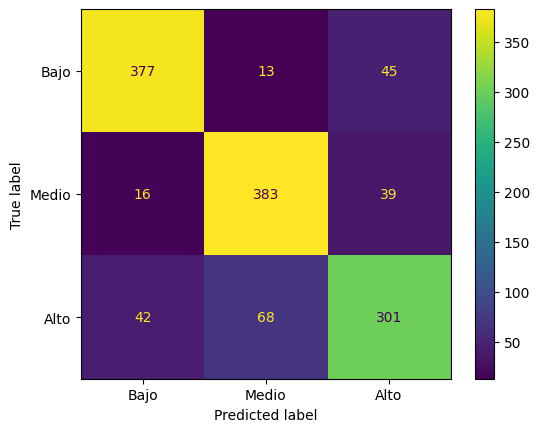

In [ ]:
# Definimos las variables X e y
X = data.drop(columns=['Life_Class', 'ROI'])  # Eliminar la columna objetivo y ROI
y = data['ROI_Class']


# Dividimos el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Estandarizamos los datos
escaler = StandardScaler()
X_train = escaler.fit_transform(X_train)
X_test = escaler.transform(X_test)

#Crear el modelo de regresión logística multinomial 
model = LogisticRegression(solver='lbfgs', max_iter=500) # multinomial es para problemas de clasificación multiclase

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['Bajo', 'Medio', 'Alto']))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Bajo', 'Medio', 'Alto'])

plt.show()


In [28]:
# --------------------
# MÉTODO 2: Ajuste automático con GridSearchCV
# --------------------
parametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Diferentes valores de regularización
    "solver": ["liblinear", "lbfgs"]  # Diferentes algoritmos de optimización
}

# Configurar GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=500), parametros, cv=5, scoring="accuracy", n_jobs=-1)

grid_search.fit(X_train, y_train)  # Entrenar búsqueda de hiperparámetros

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones del mejor modelo
y_pred_best = best_model.predict(X_test)

# Evaluación del mejor modelo
print("\nResultados con ajuste automático de hiperparámetros:")
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor Accuracy en validación cruzada: {grid_search.best_score_ * 100:.2f}%")
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')
accuracy = accuracy_score(y_test, y_pred_best)

# Mostrar las métricas
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")



Resultados con ajuste automático de hiperparámetros:
Mejores parámetros: {'C': 100, 'solver': 'lbfgs'}
Mejor Accuracy en validación cruzada: 88.99%
Accuracy: 90.34%
Precision: 90.50%
Recall: 90.34%
F1-Score: 90.39%


              precision    recall  f1-score   support

        Bajo       0.94      0.93      0.94       435
       Medio       0.93      0.89      0.91       438
        Alto       0.84      0.89      0.86       411

    accuracy                           0.90      1284
   macro avg       0.90      0.90      0.90      1284
weighted avg       0.90      0.90      0.90      1284



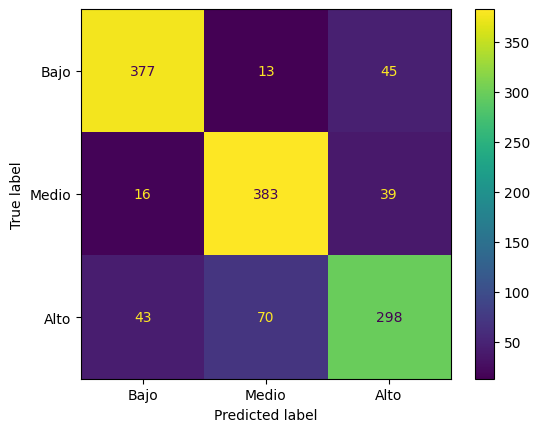

In [29]:
# Realizamos predicciones
y_pred = best_model.predict(X_test)
# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['Bajo', 'Medio', 'Alto']))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Bajo', 'Medio', 'Alto'])

plt.show()